In [1]:
import torch
import random
import numpy as np
import scipy.ndimage as ndimage
import torchvision
import PIL.Image as Image
import cv2
from torch.nn import functional as F
from ezflow.data import DeviceDataLoader, DataloaderCreator
from IPython import display
import scipy.ndimage as ndimage

In [2]:
from nnflow import flow_to_image

In [3]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
def denorm(img, mean=(0.0,0.0,0.0), std=(255.0, 255.0, 255.0)):
    return img * std + mean

In [5]:
def range_of_pixel_values(x):
    return(f"Range of pixel values: [{torch.min(x)},{torch.max(x)}]")

___
#### Augmentation params

In [6]:
# spatial params
# aug_params.min_scale = 0.2
# aug_params.max_scale = 1.0
# aug_params.vflip_prob = 0.1
# aug_params.rot1 = 0.4
# aug_params.squeeze1 = 0.3
# aug_params.scale1 = 0.3
# aug_params.tran1 = 0.4
# aug_params.scale2 = 0.1


# color augs:
# aug_params.lmult_factor = 1.
# aug_params.sat_factor = 1.
# aug_params.col_factor = 1.
# aug_params.ladd_factor = 1.
# aug_params.col_rot_factor = 1.

In [7]:
aug_params = {
    "translate_params": {
      "enabled": False,
      "aug_prob": 0.0  
    },
    "rotate_params": {
      "enabled": False,
      "aug_prob": 0.0
    },
    "spatial_aug_params": { # Tested
      "enabled": True,
      "aug_prob": 0, 
      "stretch_prob": 0, 
      "min_scale": 0, 
      "max_scale": 0, 
      "max_stretch": 0, 
      "flip": True, 
      "h_flip_prob": 0.5, 
      "v_flip_prob": 0.1
    },
    "color_aug_params": { # Tested
      "enabled": True,
      "aug_prob": 0.2, 
      "brightness": 0.4, 
      "contrast": 0.4, 
      "saturation": 0.4, 
      "hue": 0.15915494309189535
    },
    "eraser_aug_params":{ # Tested
      "enabled": True,
      "aug_prob": 1,
      "bounds": [50, 100]
    },
    "noise_params": { # Tested
        "enabled":True, 
        "aug_prob": 1, 
        "noise_std_range": 0.06 * 255.0
    },
    "spatial_params": { # Tested
        "enabled":True, 
        "scale": [0.3, 0.03, 0.1],
        "rot": [0.4, 0.03],
        "trans": [0.4, 0.03],
        "squeeze": [0.3, 0.],
        "black": False
    },
    "chromatic_params": { # Not working
        "enabled": False, 
        "lmult_factor": 1.,
        "sat_factor": 1.,
        "col_factor": 1.,
        "ladd_factor": 1.,
        "col_rot_factor": 1.
    }
}

In [13]:
0.06 * 255.0

15.299999999999999

#### Dataloader

In [8]:
dataset_path = "../../datasets/FlyingChairs_release/data"

In [9]:
loader = DataloaderCreator(batch_size=1, num_workers=1, pin_memory=True, append_valid_mask=False)
loader.add_FlyingChairs(
    root_dir=dataset_path,
    crop=True,
    crop_size=[384, 448],
    crop_type="random",
    augment=True,
    aug_params=aug_params,
    norm_params={
        "use": True, "mean":[0.0, 0.0, 0.0], "std":[255.0, 255.0, 255.0]
    }
)
train_dl = loader.get_dataloader()

Total image pairs loaded: 22232/22232



In [10]:
train_ds = loader.dataset_list[0]

In [11]:
(img1,img2), flow = train_ds[2000]

img1.shape, img2.shape, flow.shape, range_of_pixel_values(img1)

C:\Users\prajn\miniconda3\envs\ezflow\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
C:\Users\prajn\miniconda3\envs\ezflow\lib\site-packages\torch\nn\functional.py:4004: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


(torch.Size([3, 384, 448]),
 torch.Size([3, 384, 448]),
 torch.Size([2, 384, 448]),
 'Range of pixel values: [0.0,1.0]')

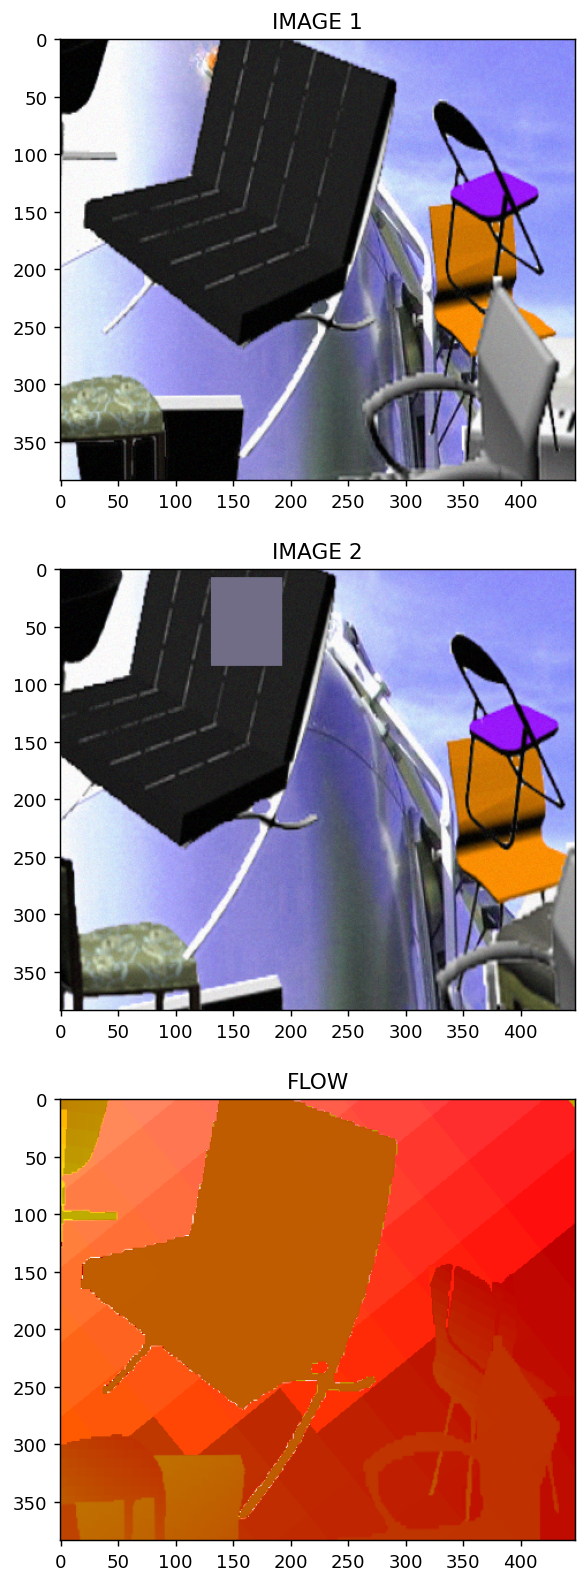

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=True, figsize=(6, 15), dpi=130)

plt.subplot(3,1,1)
ax1.set_title(f"IMAGE 1")
image1 = denorm(img1.squeeze().permute(1,2,0).numpy()).astype(np.uint8)
plt.imshow(image1)

plt.subplot(3,1,2)
ax2.set_title(f"IMAGE 2")
image2 = denorm(img2.squeeze().permute(1,2,0).numpy()).astype(np.uint8)
plt.imshow(image2)

plt.subplot(3,1,3)
ax3.set_title(f"FLOW")
_flow = flow.squeeze().permute(1,2,0).numpy().astype(np.uint8)
plt.imshow(flow_to_image(_flow))

____

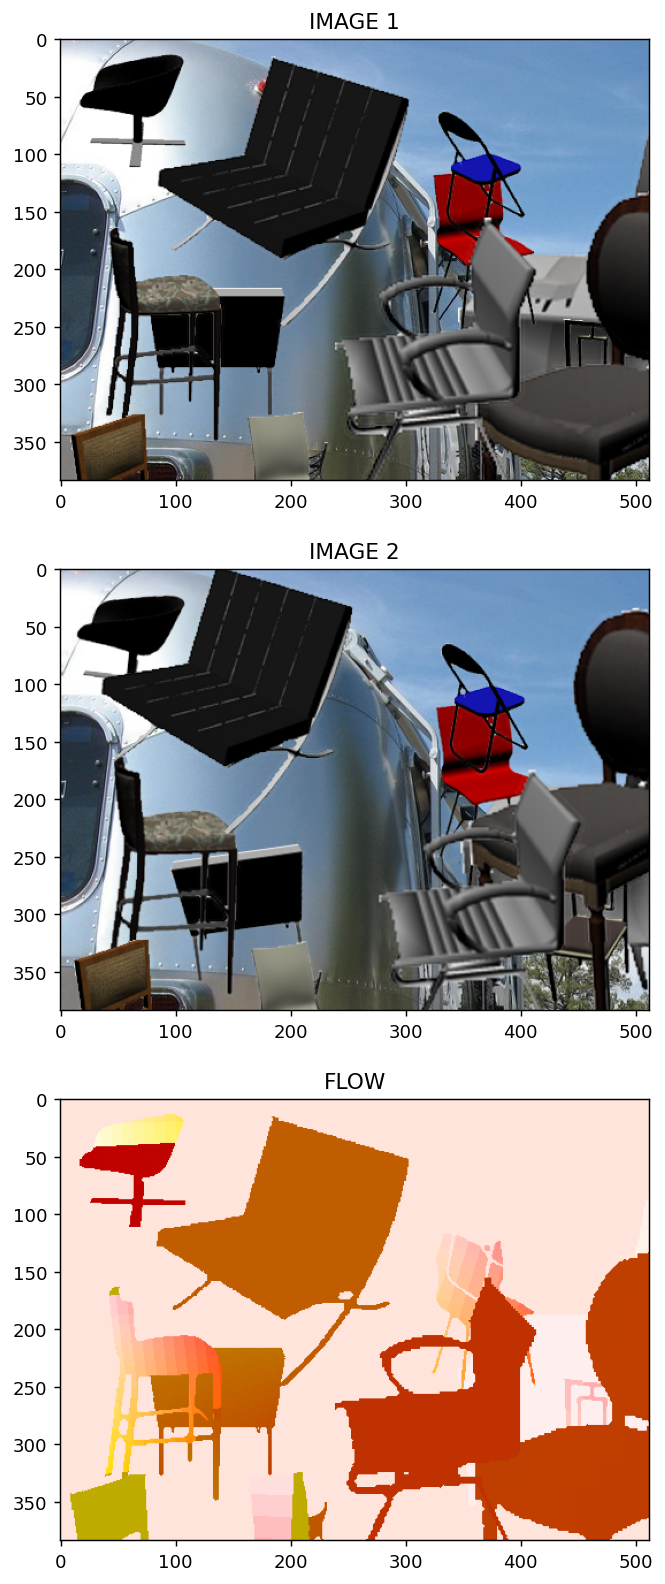

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=True, figsize=(6, 15), dpi=130)

plt.subplot(3,1,1)
ax1.set_title(f"IMAGE 1")
image1 = denorm(img1.squeeze().permute(1,2,0).numpy()).astype(np.uint8)
plt.imshow(image1)

plt.subplot(3,1,2)
ax2.set_title(f"IMAGE 2")
image2 = denorm(img2.squeeze().permute(1,2,0).numpy()).astype(np.uint8)
plt.imshow(image2)

plt.subplot(3,1,3)
ax3.set_title(f"FLOW")
_flow = flow.squeeze().permute(1,2,0).numpy().astype(np.uint8)
plt.imshow(flow_to_image(_flow))